In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, KFold
from sklearn.feature_selection import f_regression, mutual_info_regression, f_classif
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)



In [3]:
#read in training file 
training_data = pd.read_csv('../Data/hip_fracture_training.csv')

In [4]:
for col in training_data.columns:
    print(col)


HIP_PREOP_DEMENTIA
HIP_PREOP_DELIRIUM
HIP_PREOP_BONEMEDS
HIP_PREOP_MOBAID
HIP_PREOP_PRESSORE
HIP_MED_COMGMT
HIP_STDCARE
HIP_WBAT_POD1
HIP_DVT_28D
HIP_FRACTYPE
HIP_PATHFRAC
HIP_POST_PRESSORE
HIP_POST_DELIRIUM
HIP_POST_MOBAID
HIP_POST_BONEMEDS
SEX
RACE_NEW
ETHNICITY_HISPANIC
CPT
WORKRVU
INOUT
TRANST
AGE
OPERYR
DISCHDEST
ANESTHES
ELECTSURG
HEIGHT
WEIGHT
DIABETES
SMOKE
DYSPNEA
FNSTATUS2
VENTILAT
HXCOPD
ASCITES
HXCHF
HYPERMED
RENAFAIL
DIALYSIS
DISCANCR
WNDINF
STEROID
WTLOSS
BLEEDIS
TRANSFUS
PRSEPIS
PRSODM
PRBUN
PRCREAT
PRWBC
PRHCT
PRPLATE
EMERGNCY
ASACLAS
OPTIME
TOTHLOS
ADMQTR
HTOODAY
NSUPINFEC
SUPINFEC
SSSIPATOS
NWNDINFD
WNDINFD
DSSIPATOS
NORGSPCSSI
ORGSPCSSI
OSSIPATOS
NDEHIS
DEHIS
NOUPNEUMO
OUPNEUMO
PNAPATOS
NREINTUB
REINTUB
NPULEMBOL
PULEMBOL
NFAILWEAN
FAILWEAN
VENTPATOS
NRENAINSF
RENAINSF
NOPRENAFL
OPRENAFL
NURNINFEC
URNINFEC
UTIPATOS
NCNSCVA
CNSCVA
NCDARREST
CDARREST
NCDMI
CDMI
NOTHBLEED
OTHBLEED
NOTHDVT
OTHDVT
NOTHSYSEP
OTHSYSEP
SEPSISPATOS
NOTHSESHOCK
OTHSESHOCK
SEPSHOCKPATOS
RETURNO

## Cell is just for storing information - does not do anything


In [5]:
#pot operative models 
#vector to keep track of what we are dropping
store_dropped_post = ['VentPost_94', 'CardiacArrestPost_103', 'AcuterenalPost_97', 'WoundDisruptionPost_86',  'SSIPost_80', 'PostOpMobAid_33', 'PostOpBoneMed_35']

post_cols = [
   'DeepSSIPost_81', 'OrganSpacePost_84', 'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 
    'ProgRenalPost_96', 'UTIPost_100', 'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 
    'DVTProphylaxisPost','SepsisPost_112','ReOPPost_116', 'CardiacComplications', 
    'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21', 'PostOpPRESSORE_26', 'PostOpDelirium_29']

#pre-operative columns - keep all for now because I want to see interactions
preop_cols = ['PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE', 
              'SmokePre_37', 'DyspneaPre_38', 'DyspneaPre_39', 'DyspneaPre_40', 
              'FncStatusPre_41', 'FncStatusPre_42', 'FncStatusPre_43', 'FncStatusPre_44', 
              'VentDepPre_46', 'COPDPre_48', 'AscitesPre_50', 'CHFPre_52', 'HTNPre_54', 
              'DialysisPre_56', 'CancerPre_58', 'WoundInfectionPre_60', 'SteroidPre_62', 
              'WtLossPre_64', 'BleedingDisPre_66', 'TfnPre_68', 'SepsisPre_69', 'SepsisPre_70', 
              'SepsisPre_71', 'SepsisPre_72', 'ASAPre_73', 'ASAPre_74', 'ASAPre_75', 'ASAPre_76', 
              'ASAPre_77', 'ASAPre_78', 'PreOpDementia_2', 'PreOpDelirium_5', 'PreOpBoneMeds_7', 
              'PreOpMOBAID_10', 'PreOpPressSore_12', 'PartialorFullFuncStatus', 'DiabetesBinary',
              'MFI5','READMISSION30D']

#peri-operative columns - 
peri_dropped = ['DispoLocationPost_21', 'DispoLocationPost_22', 'DispoLocationPost_26', 'DispoLocationPost_29', 'DispoLocationPost_32', 'TransferStatus_19', 'TransferStatus_20',
     'DispoLocationPost_23', 'DispoLocationPost_24', 'PathologicHipFractures_49', 'PathologicHipFractures_50', ]

#adding LOS, 
peri_cols = ['TransferStatus_17', 'TransferStatus_18','DispoLocationPost_28',
             'DispoLocationPost_30', 'MEDMGMT_14', 'StandardHip_17', 'HipFractureType_44',
             'HipFractureType_45', 'HipFractureType_46', 'HipFractureType_47', 'HipFractureType_48',
              'PathologicHipFractures_51', 'INOUT', 'EMERGNCY', 'OPTIME', 'TOTLOS', 'HTOODAY' ]

#demographic columns
dem_cols = ['ObesityBinary', 'MinorityPatient', 'AGE', 'Ethnicity_14', 'GenderData_1', 'GenderData_2', 'GenderData_3', 'RaceData_4', 
'RaceData_5', 'RaceData_Black', 'RaceData_7', 'RaceData_8', 'RaceData_9','RaceData_10', 'RaceData_11' ]




In [6]:
full_cols = ['DeepSSIPost_81', 'OrganSpacePost_84', 'PneumoniaPost_88', 'ReintubPost_90', 'PulmEmbPost_92', 
    'ProgRenalPost_96', 'UTIPost_100', 'MIPost_105', 'BleedingTfnPost_108', 'DVTPost_109', 
    'DVTProphylaxisPost28_24','SepsisPost_112','ReOPPost_116', 'CardiacComplications', 
    'InfectiousComplications', 'Stroke_2', 'WBATPOD1_21', 'PostOpPRESSORE_26', 'PostOpDelirium_29', 
    'PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE', 
    'SmokePre_37', 'DyspneaPre_38', 'DyspneaPre_39', 'DyspneaPre_40', 
    'FncStatusPre_41', 'FncStatusPre_42', 'FncStatusPre_43', 'FncStatusPre_44', 
    'VentDepPre_46', 'COPDPre_48', 'AscitesPre_50', 'CHFPre_52', 'HTNPre_54', 
    'DialysisPre_56', 'CancerPre_58', 'WoundInfectionPre_60', 'SteroidPre_62', 
    'WtLossPre_64', 'BleedingDisPre_66', 'TfnPre_68', 'SepsisPre_69', 'SepsisPre_70', 
    'SepsisPre_71', 'SepsisPre_72', 'ASAPre_73', 'ASAPre_74', 'ASAPre_75', 'ASAPre_76', 
    'ASAPre_77', 'ASAPre_78', 'PreOpDementia_2', 'PreOpDelirium_5', 'PreOpBoneMeds_7', 
    'PreOpMOBAID_10', 'PreOpPressSore_12', 'PartialorFullFuncStatus', 'DiabetesBinary','MFI5', 
    'ObesityBinary', 'MinorityPatient', 'AGE', 'Ethnicity_14', 'GenderData_1', 'GenderData_2', 
    'GenderData_3', 'TransferStatus_17', 
    'TransferStatus_18','DispoLocationPost_28','DispoLocationPost_30', 'MEDMGMT_14', 
    'StandardHip_17', 'HipFractureType_44','HipFractureType_45', 'HipFractureType_46', 
    'HipFractureType_47', 'HipFractureType_48','PathologicHipFractures_51', 
    'INOUT', 'EMERGNCY', 'OPTIME', 'TOTHLOS', 'HTOODAY','READMISSION30D']

def filter_data(df, cols): 

    #filters for only the preoperative columns
    df_full = df[cols]

    return df_full   

full_df = filter_data(training_data, full_cols)

In [7]:
display(full_df.shape)
display(full_df.isna().sum())
display(full_df.info())

(29188, 88)

DeepSSIPost_81       0
OrganSpacePost_84    0
PneumoniaPost_88     0
ReintubPost_90       0
PulmEmbPost_92       0
                    ..
EMERGNCY             0
OPTIME               0
TOTHLOS              0
HTOODAY              0
READMISSION30D       0
Length: 88, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29188 entries, 0 to 29187
Data columns (total 88 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             29188 non-null  int64  
 1   OrganSpacePost_84          29188 non-null  int64  
 2   PneumoniaPost_88           29188 non-null  int64  
 3   ReintubPost_90             29188 non-null  int64  
 4   PulmEmbPost_92             29188 non-null  int64  
 5   ProgRenalPost_96           29188 non-null  int64  
 6   UTIPost_100                29188 non-null  int64  
 7   MIPost_105                 29188 non-null  int64  
 8   BleedingTfnPost_108        29188 non-null  int64  
 9   DVTPost_109                29188 non-null  int64  
 10  DVTProphylaxisPost28_24    29188 non-null  int64  
 11  SepsisPost_112             29188 non-null  int64  
 12  ReOPPost_116               29188 non-null  int64  
 13  CardiacComplications       29188 non-null  int

None

In [8]:
#next we need to scale the lab values 
lab_cols = ['PRSODM', 'PRBUN', 'PRCREAT', 'PRWBC', 'PRHCT', 'PRPLATE']

def scale_labs(df, lab_cols):
    # create a DataFrame with only the lab columns
    lab_df = df[lab_cols]

    # replace missing values (-99) with NaN
    lab_df = lab_df.replace(-99, np.nan)

    # impute missing values with the median
    imputer = SimpleImputer(strategy='median')
    
    #transform lab values 
    lab_df = imputer.fit_transform(lab_df)

    # create a StandardScaler object
    scaler = StandardScaler()

    # fit the scaler to the lab data
    scaler.fit(lab_df)

    # transform the lab data
    scaled_data = scaler.transform(lab_df)

    # create a new DataFrame with the scaled lab data
    scaled_lab_df = pd.DataFrame(scaled_data, columns=lab_cols)

    # create a new DataFrame that contains both the scaled lab columns and the other columns from the input DataFrame
    new_df = pd.concat([df.drop(lab_cols, axis=1), scaled_lab_df], axis=1)

    return new_df


scaled_df  = scale_labs(full_df, lab_cols)

In [9]:

#convert these two to binary 
display(scaled_df['EMERGNCY'].value_counts())
display(scaled_df['INOUT'].value_counts())

No     23943
Yes     5245
Name: EMERGNCY, dtype: int64

Inpatient     29110
Outpatient       78
Name: INOUT, dtype: int64

In [10]:
#convert EMERGENCY and INOUT
def convert_binary(df): 
    encoding_EMERGENCY = {'No': 0, 'Yes': 1}
    encoding_INOUT = {'Inpatient': 1, 'Outpatient': 0}

    df['EMERGNCY'] = df['EMERGNCY'].map(encoding_EMERGENCY)
    df['INOUT'] = df['INOUT'].map(encoding_INOUT)
    df_encoded = df 
    return df_encoded

df_encoded = convert_binary(scaled_df)


In [11]:
#convert these two to binary 
display(df_encoded['EMERGNCY'].value_counts())
display(df_encoded['INOUT'].value_counts())

0    23943
1     5245
Name: EMERGNCY, dtype: int64

1    29110
0       78
Name: INOUT, dtype: int64

In [12]:
def split_data(df): 
    X = df.drop(labels = ['READMISSION30D'], axis = 1) 
    y = pd.DataFrame(df['READMISSION30D']) 
    X_train,X_test,y_train,y_test = train_test_split(X, y, stratify = y, test_size= .2, random_state= 0 )
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = split_data(df_encoded)
display(X_train.info()) 
display(X_test.info())
display(y_train.info())
display(y_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             23350 non-null  int64  
 1   OrganSpacePost_84          23350 non-null  int64  
 2   PneumoniaPost_88           23350 non-null  int64  
 3   ReintubPost_90             23350 non-null  int64  
 4   PulmEmbPost_92             23350 non-null  int64  
 5   ProgRenalPost_96           23350 non-null  int64  
 6   UTIPost_100                23350 non-null  int64  
 7   MIPost_105                 23350 non-null  int64  
 8   BleedingTfnPost_108        23350 non-null  int64  
 9   DVTPost_109                23350 non-null  int64  
 10  DVTProphylaxisPost28_24    23350 non-null  int64  
 11  SepsisPost_112             23350 non-null  int64  
 12  ReOPPost_116               23350 non-null  int64  
 13  CardiacComplications       23350 non-null  

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DeepSSIPost_81             5838 non-null   int64  
 1   OrganSpacePost_84          5838 non-null   int64  
 2   PneumoniaPost_88           5838 non-null   int64  
 3   ReintubPost_90             5838 non-null   int64  
 4   PulmEmbPost_92             5838 non-null   int64  
 5   ProgRenalPost_96           5838 non-null   int64  
 6   UTIPost_100                5838 non-null   int64  
 7   MIPost_105                 5838 non-null   int64  
 8   BleedingTfnPost_108        5838 non-null   int64  
 9   DVTPost_109                5838 non-null   int64  
 10  DVTProphylaxisPost28_24    5838 non-null   int64  
 11  SepsisPost_112             5838 non-null   int64  
 12  ReOPPost_116               5838 non-null   int64  
 13  CardiacComplications       5838 non-null   

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23350 entries, 12914 to 4404
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  23350 non-null  int64
dtypes: int64(1)
memory usage: 364.8 KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5838 entries, 28216 to 13720
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   READMISSION30D  5838 non-null   int64
dtypes: int64(1)
memory usage: 91.2 KB


None

In [13]:
def rf_feature_importance(X_train,X_test,y_train): 

    #we will start off using the default scikit learn features 
    rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=5,n_estimators=1000,
                                 max_features=0.1,max_samples=0.7,random_state=0)
     #Fit the tree to the data
    rf_model.fit(X_train, y_train)

    #predict on the validation set
    preds = rf_model.predict(X_test)

    #define feature names 
    feat_names = X_train.columns 

    #define the number of features to show
    num_to_show = 55 

    # Determine the relative importance of each feature using the random forest model
    importances = rf_model.feature_importances_

    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:30][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()

    return RF_ranking, rf_model, preds

/var/folders/jc/0mjbccp53cqfmdh6hlys5sx40000gn/T/ipykernel_89611/2598169905.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


,Feat Index,Feature,Importance
0,12,ReOPPost_116,0.165101
1,14,InfectiousComplications,0.074967
2,85,PRHCT,0.047079
3,83,PRCREAT,0.046417
4,86,PRPLATE,0.045189
5,84,PRWBC,0.044984
6,79,TOTHLOS,0.043873
7,78,OPTIME,0.043537
8,82,PRBUN,0.040353
9,11,SepsisPost_112,0.034698


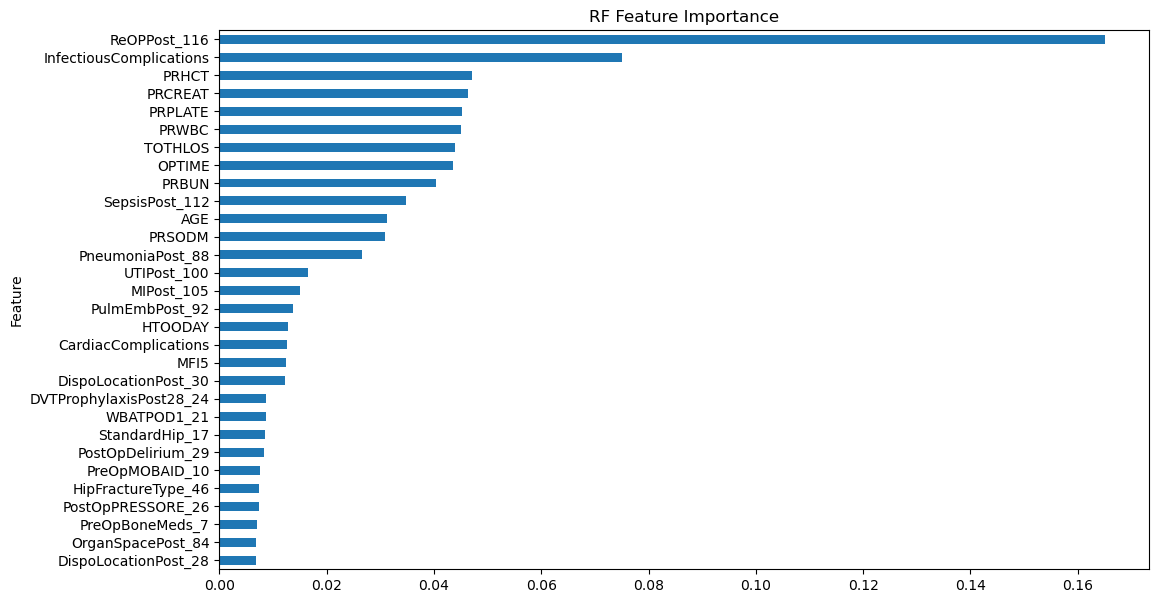

In [14]:
RF_ranking, rf_model, preds = rf_feature_importance(X_train,X_test,y_train)

the results for RandomForestClassifier(max_features=0.1, max_samples=0.7, min_samples_leaf=5,
                       n_estimators=1000, random_state=0)              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5277
           1       0.85      0.20      0.33       561

    accuracy                           0.92      5838
   macro avg       0.89      0.60      0.64      5838
weighted avg       0.92      0.92      0.90      5838



/Users/brunovalan/opt/anaconda3/envs/AIPI520/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


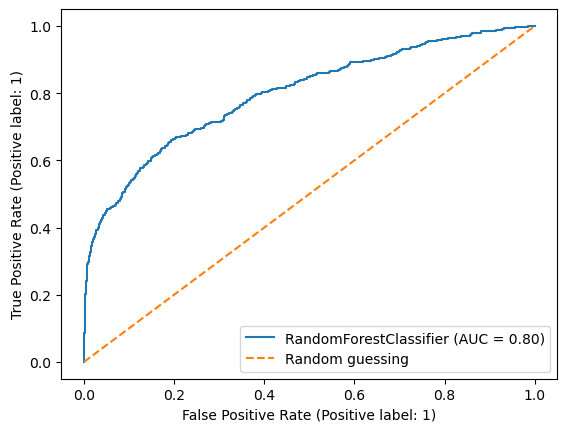

In [16]:
print(f'the results for {rf_model}' + classification_report(y_test, preds))
plot_roc_curve(rf_model,X_test,y_test)
# Add a line to show the curve for random guessing
plt.plot([0,1],[0,1],linestyle='--',label='Random guessing')
plt.legend()
plt.show()

In [17]:
#now will try with a limited feature set and see how much our predictions change
top_50 = RF_ranking['Feature'].iloc[:50].tolist()
top_20 = RF_ranking['Feature'].iloc[:20].tolist()
top_10 = RF_ranking['Feature'].iloc[:10].tolist()


In [18]:
def RF_limited_features(X_train, X_test, y_train, y_test, top_feats):
    
    X_train = X_train[top_feats]
    X_test = X_test[top_feats]

    #we will start off using the default scikit learn features 
    rf_model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=5,n_estimators=1000,
                                 max_features=0.1,max_samples=0.7,random_state=0)
     #Fit the tree to the data
    rf_model.fit(X_train, y_train)

    #predict on the validation set
    preds = rf_model.predict(X_test)

    #define feature names 
    feat_names = X_train.columns 

    #define the number of features to show
    num_to_show = len(top_feats) 

    # Determine the relative importance of each feature using the random forest model
    importances = rf_model.feature_importances_

    # Get an array of the indices that would sort "importances" in reverse order to get largest to smallest
    indices = np.argsort(importances)[::-1]
    ranked_feats = []
    for i in range(len(indices)):
        feat_name = feat_names[indices[i]]
        ranked_feats.append(feat_name)
    RF_ranking = pd.DataFrame()
    RF_ranking['Feat Index'] = indices
    RF_ranking['Feature'] = ranked_feats
    RF_ranking['Importance'] = np.sort(importances)[::-1]
    display(RF_ranking.iloc[:num_to_show,:])

    # Plot the importance value for each feature
    RF_ranking[:num_to_show][::-1].plot(x='Feature',y='Importance',kind='barh',figsize=(12,7),legend=False,title='RF Feature Importance')
    plt.show()

    print(f'the results for {RF_limited_features}' + classification_report(y_test, preds))
    plot_roc_curve(rf_model,X_test,y_test)
    #  Add a line to show the curve for random guessing
    plt.plot([0,1],[0,1],linestyle='--',label='Random guessing')
    plt.legend()
    plt.show()

    return RF_ranking, rf_model, preds



/var/folders/jc/0mjbccp53cqfmdh6hlys5sx40000gn/T/ipykernel_89611/3844278196.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


,Feat Index,Feature,Importance
0,0,ReOPPost_116,0.195592
1,1,InfectiousComplications,0.126407
2,2,PRHCT,0.098490
3,4,PRPLATE,0.097496
4,5,PRWBC,0.095757
5,3,PRCREAT,0.094079
6,7,OPTIME,0.091971
7,8,PRBUN,0.081440
8,6,TOTHLOS,0.067254
9,9,SepsisPost_112,0.051516


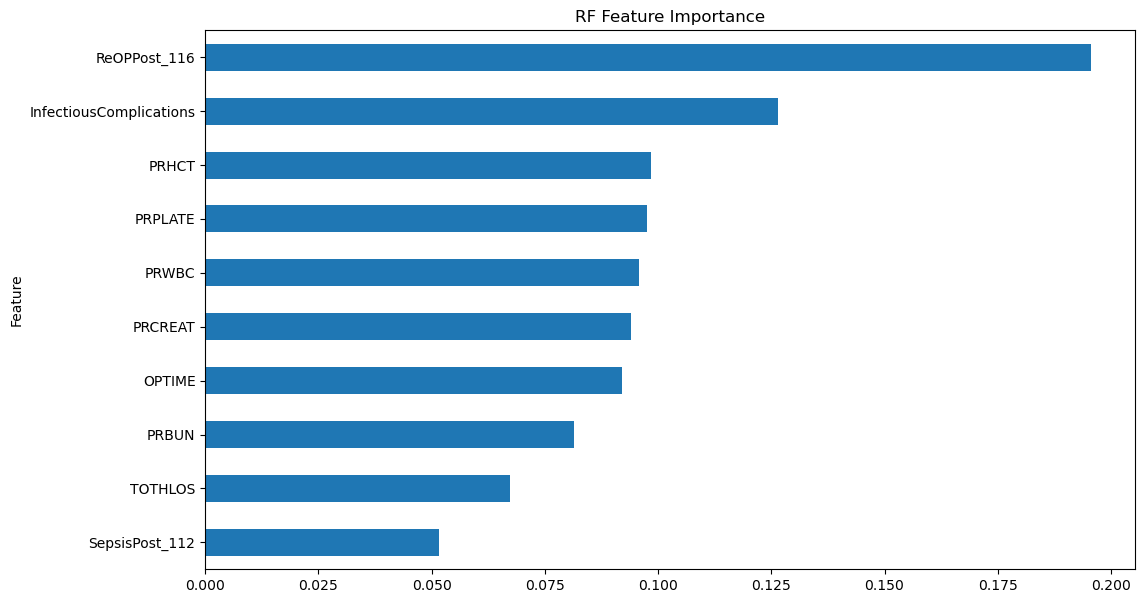

the results for <function RF_limited_features at 0x7fab989d3a60>              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5277
           1       0.85      0.22      0.34       561

    accuracy                           0.92      5838
   macro avg       0.89      0.61      0.65      5838
weighted avg       0.92      0.92      0.90      5838



/Users/brunovalan/opt/anaconda3/envs/AIPI520/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


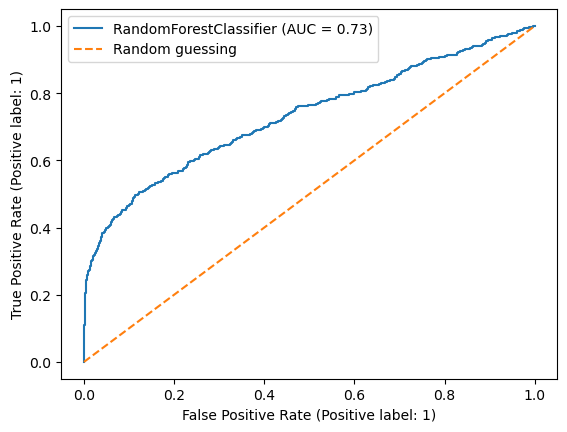

In [19]:
RF_ranking_10, rf_model_limited, preds_10 = RF_limited_features(X_train,X_test,y_train,y_test,top_10)

/var/folders/jc/0mjbccp53cqfmdh6hlys5sx40000gn/T/ipykernel_89611/3844278196.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


,Feat Index,Feature,Importance
0,0,ReOPPost_116,0.190397
1,1,InfectiousComplications,0.088450
2,2,PRHCT,0.065577
3,3,PRCREAT,0.064662
4,4,PRPLATE,0.063580
5,5,PRWBC,0.063484
6,7,OPTIME,0.060963
7,8,PRBUN,0.057075
8,6,TOTHLOS,0.056577
9,9,SepsisPost_112,0.044511


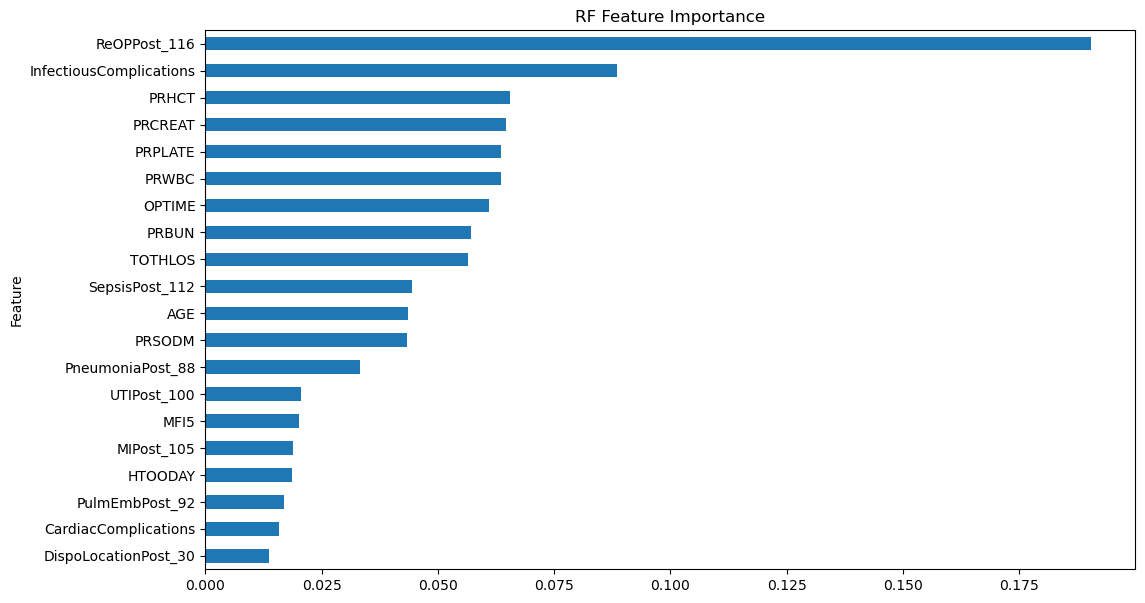

the results for <function RF_limited_features at 0x7fab989d3a60>              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5277
           1       0.86      0.21      0.34       561

    accuracy                           0.92      5838
   macro avg       0.89      0.60      0.65      5838
weighted avg       0.92      0.92      0.90      5838



/Users/brunovalan/opt/anaconda3/envs/AIPI520/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


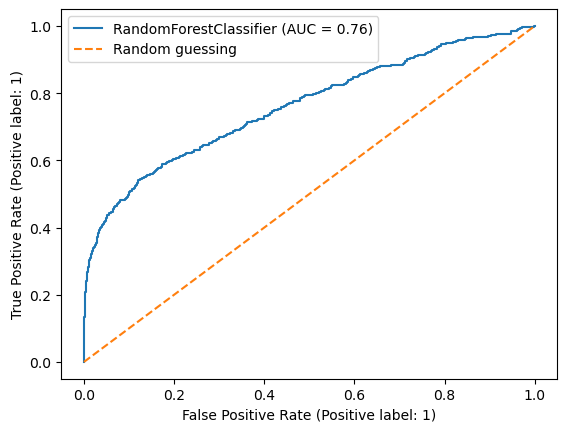

In [20]:
RF_ranking_20, rf_model_20, preds_20 = RF_limited_features(X_train,X_test,y_train,y_test,top_20)

/var/folders/jc/0mjbccp53cqfmdh6hlys5sx40000gn/T/ipykernel_89611/3844278196.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


,Feat Index,Feature,Importance
0,0,ReOPPost_116,0.160890
1,1,InfectiousComplications,0.073646
2,2,PRHCT,0.051435
3,3,PRCREAT,0.051022
4,5,PRWBC,0.049603
5,4,PRPLATE,0.048810
6,7,OPTIME,0.047792
7,6,TOTHLOS,0.046589
8,8,PRBUN,0.044156
9,9,SepsisPost_112,0.037131


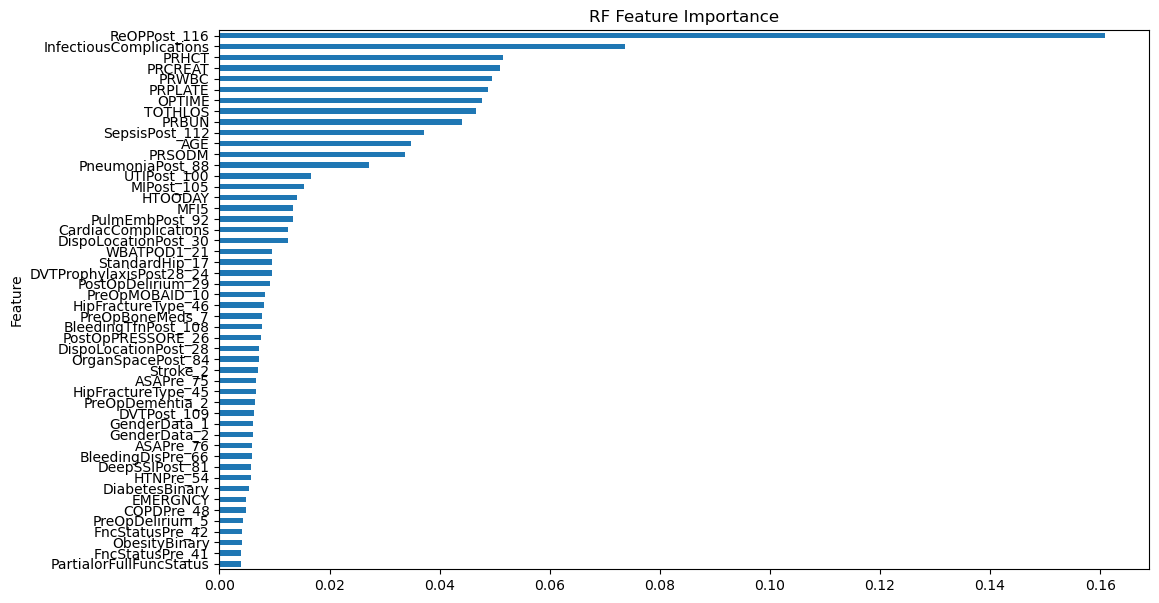

the results for <function RF_limited_features at 0x7fab989d3a60>              precision    recall  f1-score   support

           0       0.92      1.00      0.96      5277
           1       0.87      0.21      0.33       561

    accuracy                           0.92      5838
   macro avg       0.90      0.60      0.65      5838
weighted avg       0.92      0.92      0.90      5838



/Users/brunovalan/opt/anaconda3/envs/AIPI520/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


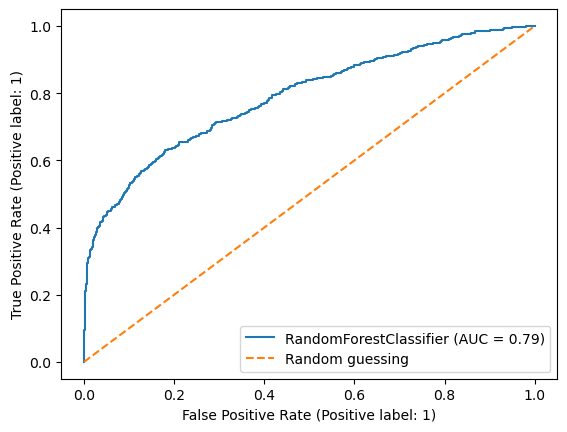

In [21]:
RF_ranking_50, rf_model_50, preds_50 = RF_limited_features(X_train,X_test,y_train,y_test,top_50)

#save this function here so I can run whole notebook without grid search
def optimize_model(X_train, X_test, y_train, y_test): 
    
    params = {'min_samples_leaf':[1,5,20],'n_estimators':[100,1000],
          'max_features':[0.1,0.5,.7,1.],'max_samples':[0.5,None]}

    model = RandomForestClassifier()

    grid_search = GridSearchCV(model,params,cv=3)
    grid_search = grid_search.fit(X_train,y_train)

    # Display the best parameters
    display(grid_search.best_params_) 

    # Retrain the optimal model on full training set and calculate test set accuracy
    opt_rf_model = RandomForestClassifier(**grid_search.best_params_,random_state=0)
    opt_rf_model.fit(X_train,y_train)

    

    # Calculate the accuracy on the test set
    test_preds = opt_rf_model.predict(X_test)
    test_acc = np.sum(test_preds==y_test)/len(y_test)
    print('Test set accuracy is {:.3f}'.format(test_acc))


    return test_acc, test_preds, opt_rf_model   